In [1]:
import numpy as np 

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.pipeline import Pipeline

from imblearn.pipeline import Pipeline as ImbPipeline

from imblearn.over_sampling import SMOTE

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.metrics import f1_score, roc_auc_score, auc, roc_curve, classification_report, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score

import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### Data Preparation

#### Data Cleaning 

In [2]:
# Opening the csv file

df = pd.read_csv(r'dataset.csv')

df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [3]:
# Get Dataset information

df.info(max_cols = None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Get Data shape 

shape = df.shape 

print(f'The Dataset has {shape[0]} Rows and {shape[1]} Columns')

The Dataset has 1470 Rows and 35 Columns


In [5]:
# Check for Empty cells

df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# Check for Null Values

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# Check for Duplicates

df.duplicated().sum()

np.int64(0)

In [8]:
df['StockOptionLevel'].value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

In [9]:
# Get the Value Count of each Column

df.nunique().sort_values()


EmployeeCount                  1
Over18                         1
StandardHours                  1
Attrition                      2
OverTime                       2
PerformanceRating              2
Gender                         2
BusinessTravel                 3
Department                     3
MaritalStatus                  3
RelationshipSatisfaction       4
StockOptionLevel               4
JobSatisfaction                4
EnvironmentSatisfaction        4
JobInvolvement                 4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

#### Data Categorization

##### Redundancy Check

In [10]:
# Get redundant columns

redundant_cols = []

for col in df.columns.tolist() :
     if df[col].value_counts().nunique() == 1 :
        redundant_cols.append(col)
        
redundant_cols

['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']

In [11]:
# Remove redundancy

df.drop(columns = redundant_cols, inplace = True)

len(df.columns)


31

##### Columns check

In [12]:
# Check for Numerical Columns 

numerical_cols = df.select_dtypes(include = 'number').columns.tolist()

print(str( len(numerical_cols) ) + ' Numerical Columns \n \n' + str(numerical_cols) )

23 Numerical Columns 
 
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [13]:
# Check for Categorical Columns

nominal_cols = df.select_dtypes( include = ['object'] ).columns.tolist()

print(str( len(nominal_cols) ) + ' Nominal Categorical Columns \n \n' + str(nominal_cols) )

8 Nominal Categorical Columns 
 
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [14]:
# Get Ordinal categorical columns

ordinal_cols = df[['Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']].columns.tolist()

print(str( len(ordinal_cols) ) + ' Ordinal Categorical Columns \n \n' + str(ordinal_cols) )

9 Ordinal Categorical Columns 
 
['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']


In [15]:
# Encode Overtime and Attrition

df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No' : 0})

df['Attrition'] = df['Attrition'].map({ 'Yes': 1, 'No': 0 })

In [16]:
# Updated dataset size 

shape = df.shape 

print(f'The Dataset now has {shape[0]} Rows and {shape[1]} Columns after removing Redundancies')

The Dataset now has 1470 Rows and 31 Columns after removing Redundancies


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### Exploratory Data Analysis

#### General Correlation Analysis

In [18]:
# Copy and Encode df 

df_copy = df.copy()

for col in ordinal_cols and numerical_cols and nominal_cols:
        df_copy[col] = LabelEncoder().fit_transform(df_copy[[col]])
        


In [19]:
df_copy.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0


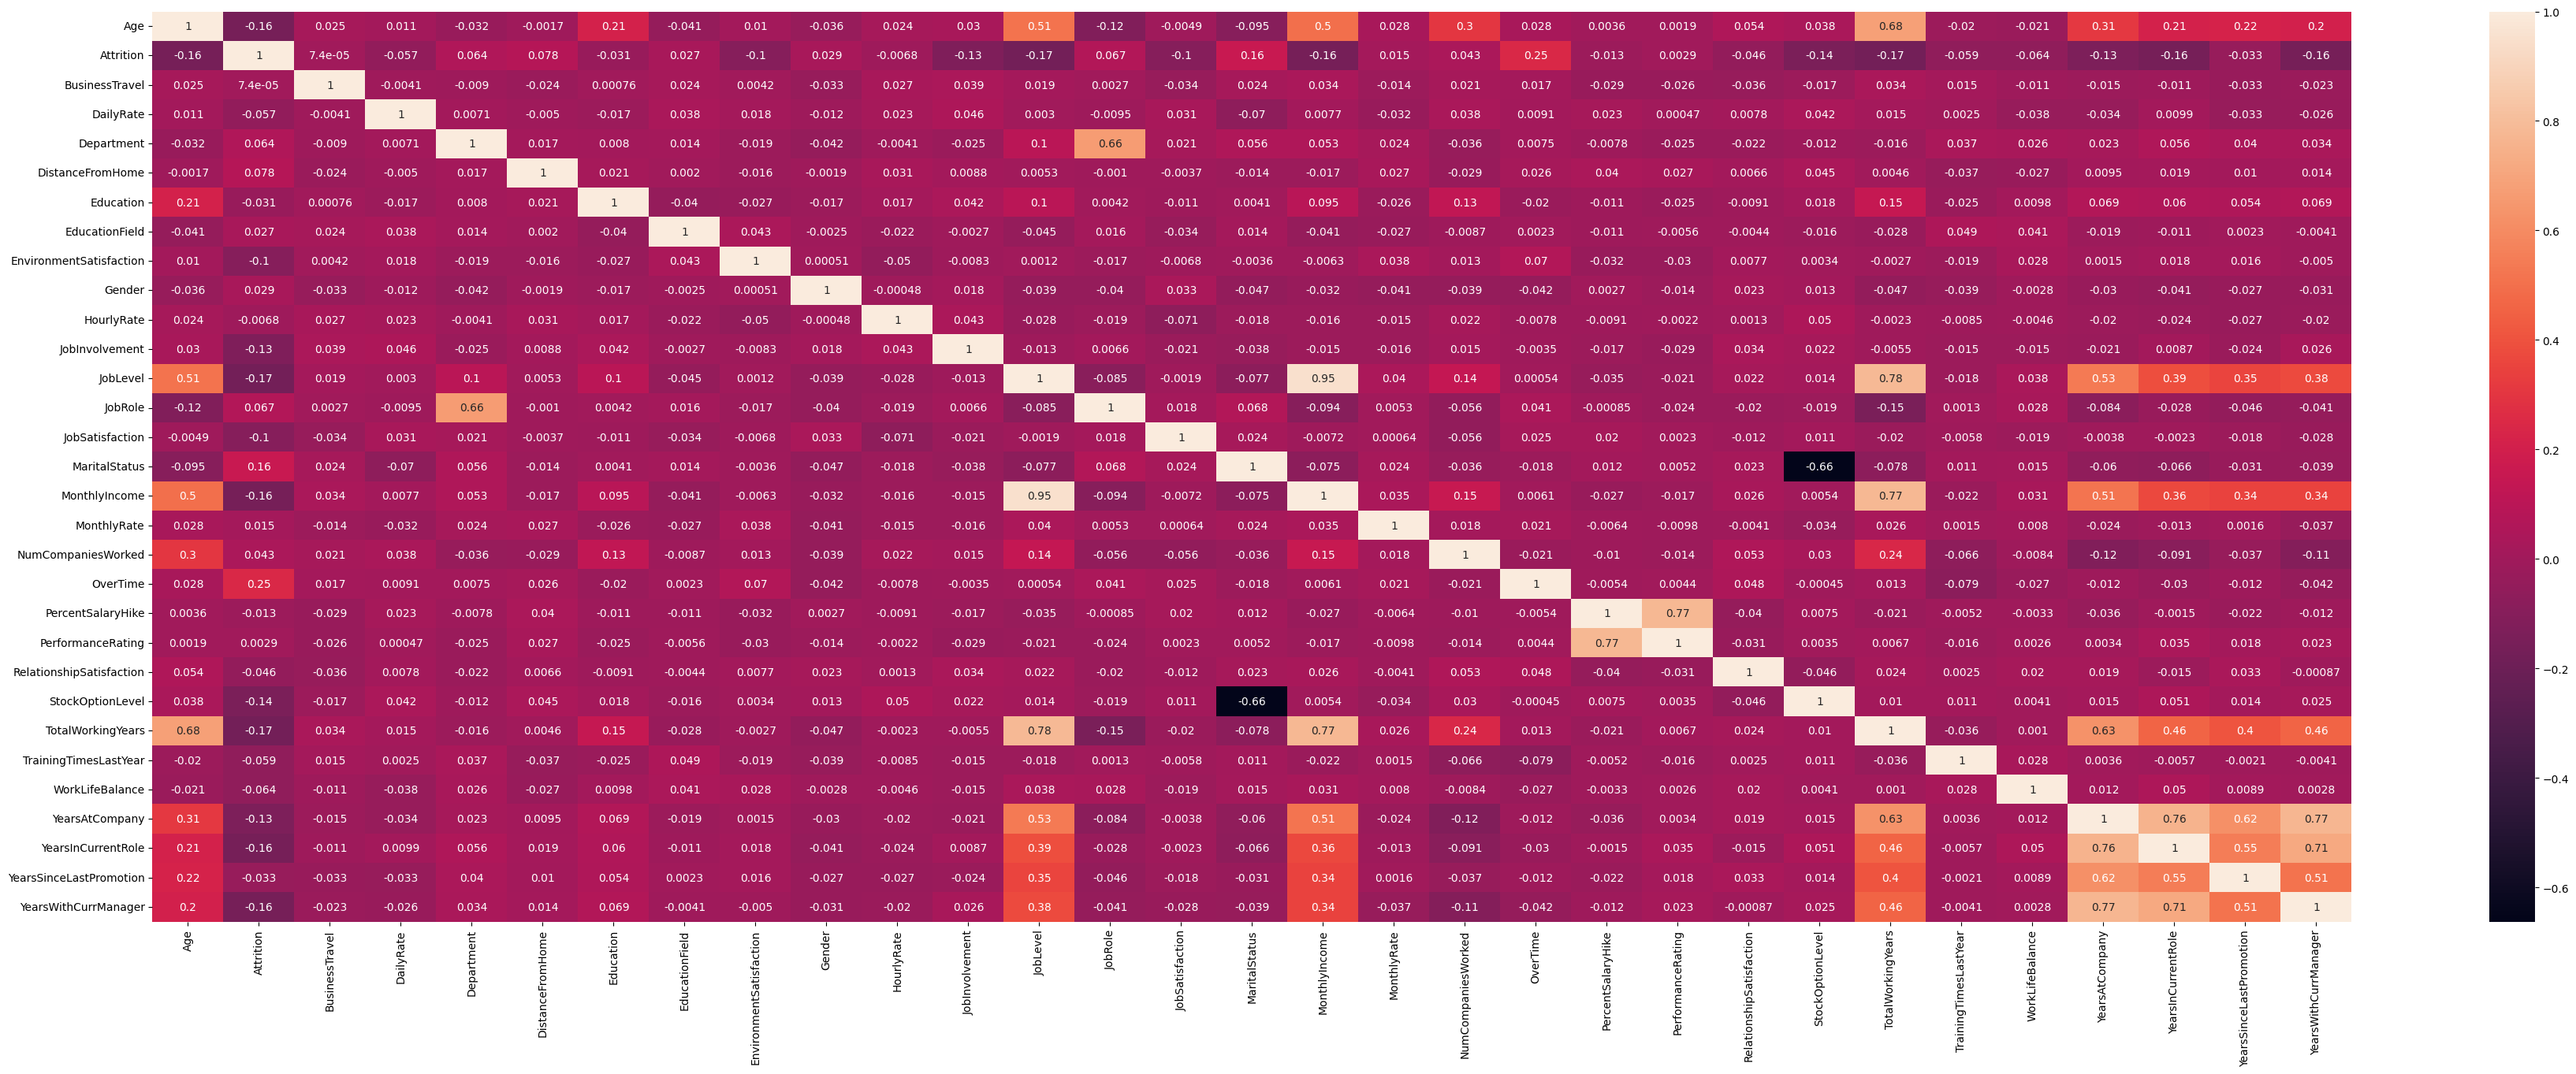

In [20]:
# Plot a correlation chart of df features 

df_encoded_corr = df_copy.corr()

plt.figure(figsize = (45, 15))

sns.heatmap(df_encoded_corr, annot = True)

plt.show()

In [21]:
# List out the correlation of each feature with Attrition

df_corr_list = df_encoded_corr['Attrition'].sort_values(ascending = True ).reset_index()

df_corr_list

,index,Attrition
0,TotalWorkingYears,-0.171063
1,JobLevel,-0.169105
2,YearsInCurrentRole,-0.160545
3,MonthlyIncome,-0.159840
4,Age,-0.159205
5,YearsWithCurrManager,-0.156199
6,StockOptionLevel,-0.137145
7,YearsAtCompany,-0.134392
8,JobInvolvement,-0.130016
9,JobSatisfaction,-0.103481


 From the `Correlation Chart of df`, it is evident that individually, none of the features correlate highly with the target `Attrition` 

#### Age 

In [22]:
df['Age'].value_counts()

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
28    48
27    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
48    19
51    19
53    19
54    18
52    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64

##### Univariate Analysis

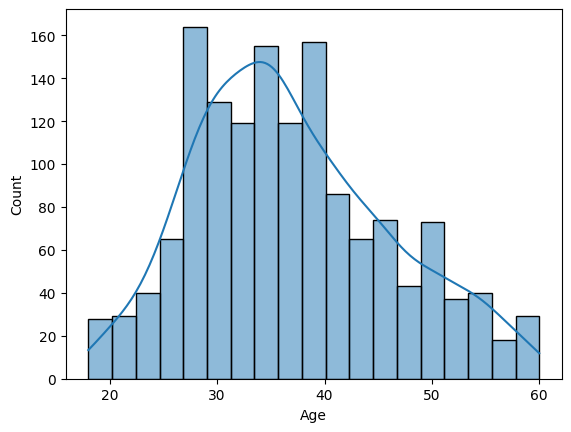

In [23]:
sns.histplot(data = df, x = 'Age', kde=True)


plt.show()

##### Bivariate Analysis

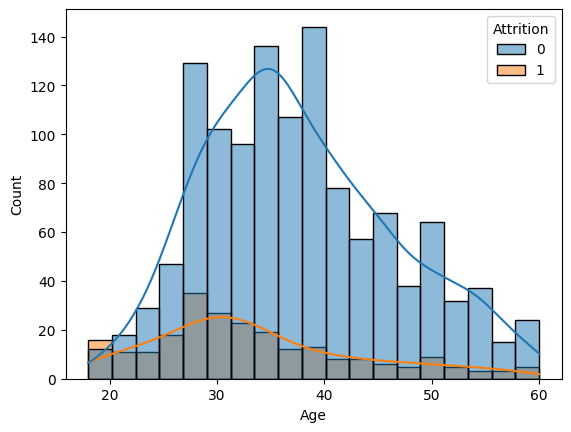

In [24]:

sns.histplot(data = df, x = 'Age', hue ='Attrition', kde=True)


plt.show()

In [25]:
Age_group = pd.cut(df['Age'], bins = [18, 20, 30, 40, 50, 60 ], labels = ['18 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60'])

Age_group

0       41 - 50
1       41 - 50
2       31 - 40
3       31 - 40
4       21 - 30
         ...   
1465    31 - 40
1466    31 - 40
1467    21 - 30
1468    41 - 50
1469    31 - 40
Name: Age, Length: 1470, dtype: category
Categories (5, object): ['18 - 20' < '21 - 30' < '31 - 40' < '41 - 50' < '51 - 60']

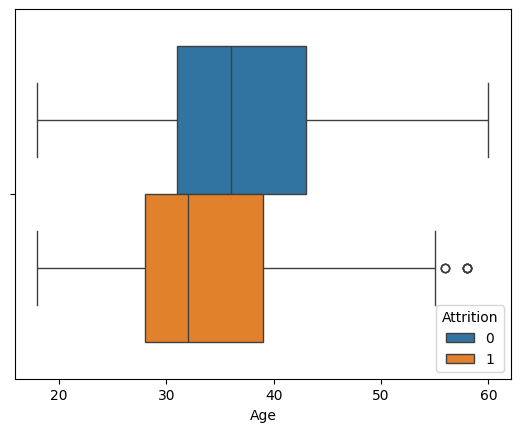

In [26]:
sns.boxplot(data = df, x = 'Age', hue ='Attrition')

plt.show()

#### Business Travel

In [27]:
Business_Travel = df['BusinessTravel'].value_counts()

Business_Travel.reset_index()

,BusinessTravel,count
0,Travel_Rarely,1043
1,Travel_Frequently,277
2,Non-Travel,150


##### Univariate Analysis : Distribution of Business Travel

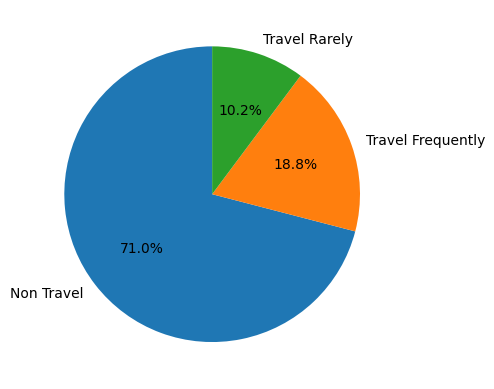

In [28]:
# Distribution of Business Travel categories 
labels = ['Non Travel', 'Travel Frequently', 'Travel Rarely']

plt.pie(Business_Travel, labels = labels, autopct='%1.1f%%', startangle=90)

plt.show()

##### Bivariate Analysis : Business Travel X Attrition

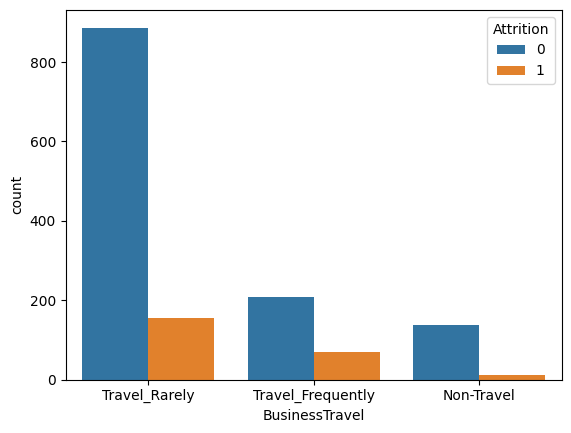

In [29]:

sns.countplot(data = df, x = 'BusinessTravel' , hue = 'Attrition' )

plt.show()

Generally, most employees `Rarely Travel`. 
Amongst those that ` Do Not Travel `, the numbers of employees who decided to stay is dominant. 
Amongst the employees that `Travel Frequently` , the attrition rate is higher.

#### Department

##### Univariate Analysis : Distribution of Department

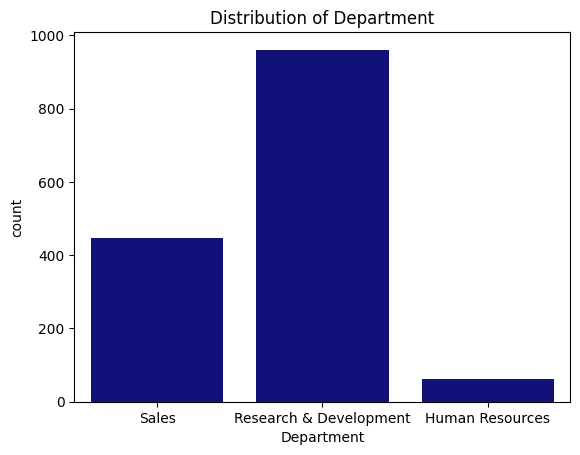


Department Counts: 

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


In [30]:
sns.countplot(data=df, x='Department', color='Darkblue')
plt.title('Distribution of Department')
plt.show()

print("\nDepartment Counts: \n")
print(df['Department'].value_counts())

##### Bivariate Analysis : Department X Attrition.


Department vs Attrition (%): 

Attrition                       0          1
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


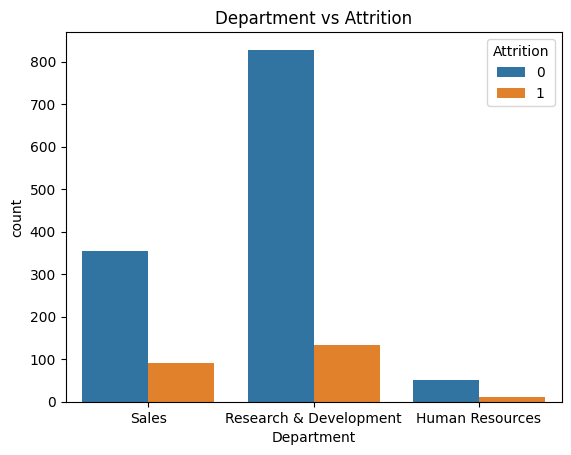

In [31]:
Dept_Attr = pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100
print("\nDepartment vs Attrition (%): \n")
print(Dept_Attr)

sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Department vs Attrition')
plt.show()


In [32]:
df['DistanceFromHome'].value_counts().reset_index()

,DistanceFromHome,count
0,2,211
1,1,208
2,10,86
3,9,85
4,3,84
5,7,84
6,8,80
7,5,65
8,4,64
9,6,59


#### Education

In [33]:
df['Education'].value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

##### Univariate Analysis

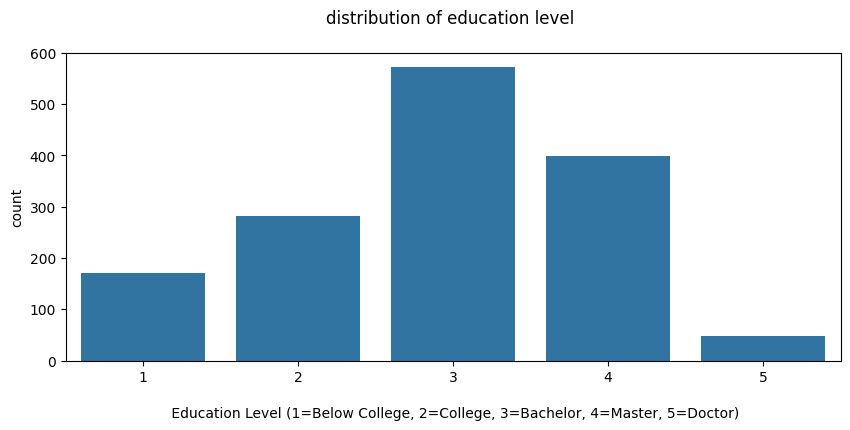

In [34]:
plt.figure(figsize = (10, 4))
sns.countplot(x=df['Education'])
plt.title('distribution of education level \n')
plt.xlabel("\n Education Level (1=Below College, 2=College, 3=Bachelor, 4=Master, 5=Doctor)")
plt.show()

##### Bivariate Analysis

In [35]:
pd.crosstab(df['Education'], df['Attrition'])

Attrition,0,1
Education,,
1,139,31
2,238,44
3,473,99
4,340,58
5,43,5


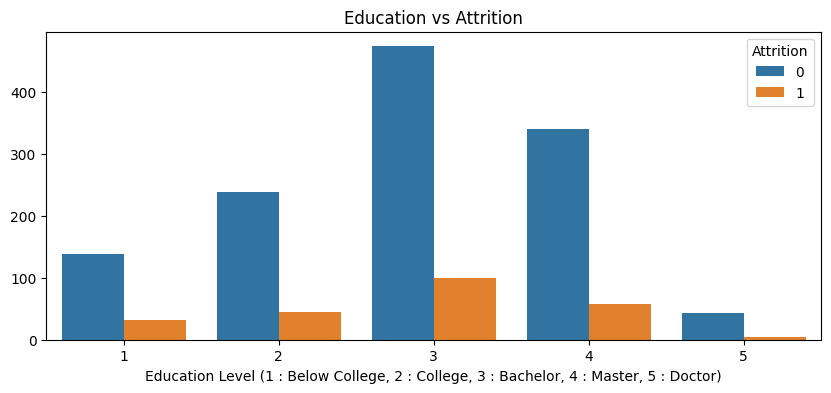


Education vs Attrition (%): 

Attrition          0          1
Education                      
1          81.764706  18.235294
2          84.397163  15.602837
3          82.692308  17.307692
4          85.427136  14.572864
5          89.583333  10.416667


In [36]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Education', hue='Attrition')
plt.title("Education vs Attrition")
plt.xlabel("Education Level (1 : Below College, 2 : College, 3 : Bachelor, 4 : Master, 5 : Doctor)")
plt.ylabel("")
plt.show()

Education_attr = pd.crosstab(df['Education'], df['Attrition'], normalize='index') * 100
print("\nEducation vs Attrition (%): \n")
print(Education_attr)

#### Job Involvement

In [37]:
df['JobInvolvement'].value_counts()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

##### Univariate Analysis

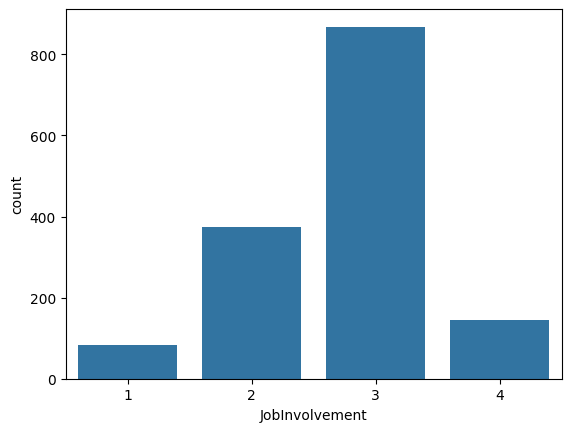

In [38]:
sns.countplot(data = df, x = 'JobInvolvement')

plt.show()

##### Bivariate Analysis

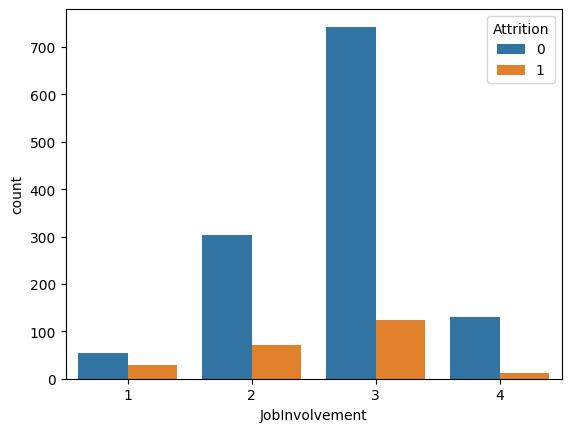

In [39]:
sns.countplot(data = df, x = 'JobInvolvement', hue = 'Attrition')

plt.show()

#### Gender

In [40]:
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

##### Univariate Analysis

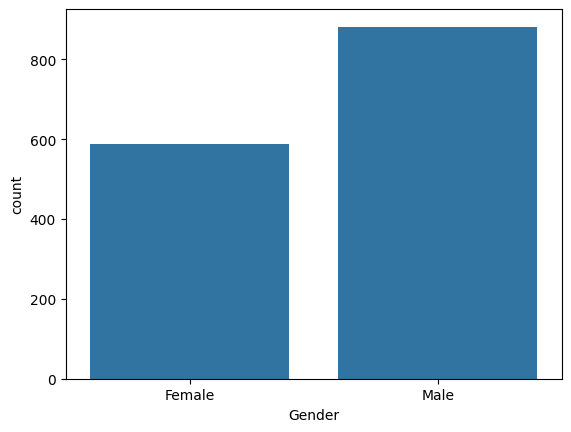

In [41]:
sns.countplot(data = df, x = 'Gender')

plt.show()

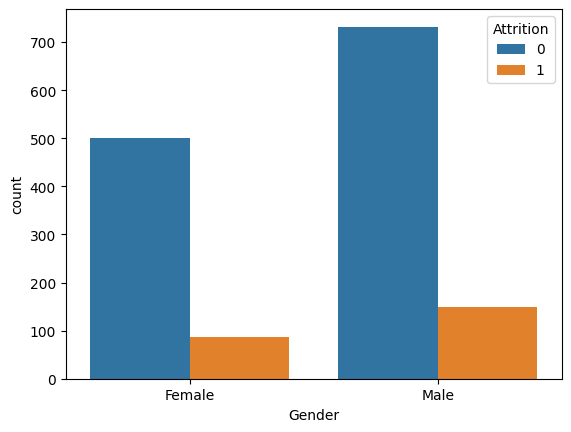

In [42]:
sns.countplot(data = df, x = 'Gender', hue = 'Attrition')

plt.show()

#### Total Working Years

In [43]:
df['TotalWorkingYears'].value_counts()

TotalWorkingYears
10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
26     14
25     14
28     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: count, dtype: int64

##### Univariate Analysis 


Univariate Analysis: TotalWorkingYears
count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64


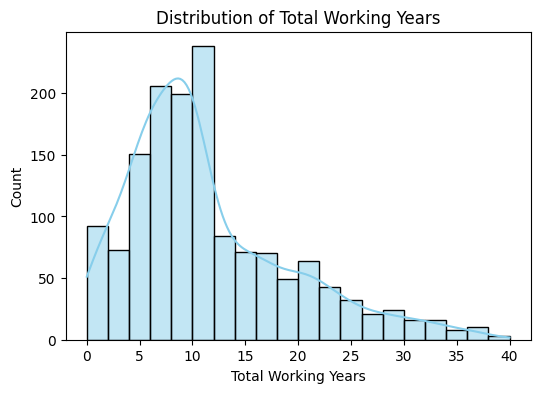

In [44]:
print("\nUnivariate Analysis: TotalWorkingYears")
print(df['TotalWorkingYears'].describe())

plt.figure(figsize=(6,4))
sns.histplot(df['TotalWorkingYears'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Total Working Years")
plt.xlabel("Total Working Years")
plt.ylabel("Count")
plt.show()

#####  Bivariate Analysis

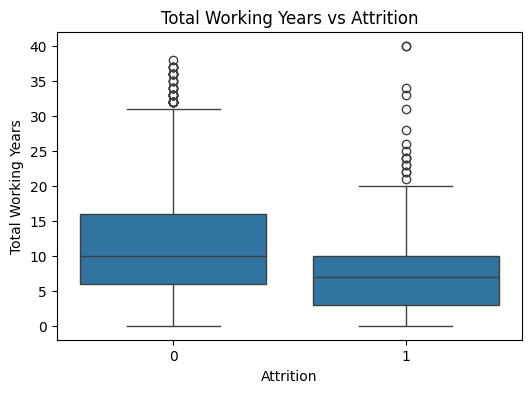

Average Total Working Years by Attrition:
Attrition
0    11.862936
1     8.244726
Name: TotalWorkingYears, dtype: float64
----------------------------------------


In [45]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df)
plt.title("Total Working Years vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Total Working Years")
plt.show()


print("Average Total Working Years by Attrition:")
print(df.groupby('Attrition')['TotalWorkingYears'].mean())
print("-"*40)

#### Work-Life Balance

In [46]:
df['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

#####  Univariate Analysis


Univariate Analysis: WorkLifeBalance 

WorkLifeBalance
1     80
2    344
3    893
4    153
Name: count, dtype: int64


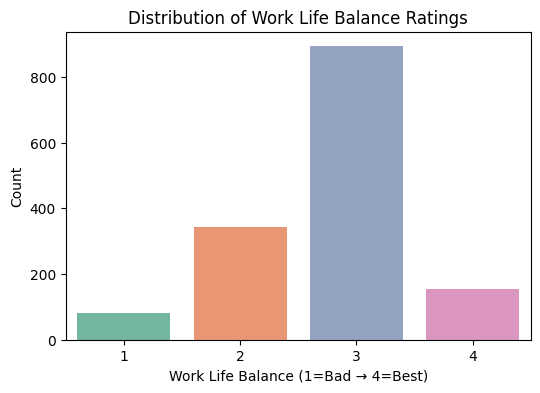

In [47]:
print("\nUnivariate Analysis: WorkLifeBalance \n")
print(df['WorkLifeBalance'].value_counts().sort_index())

plt.figure(figsize=(6,4))
sns.countplot(x='WorkLifeBalance', data=df, palette='Set2')
plt.title("Distribution of Work Life Balance Ratings")
plt.xlabel("Work Life Balance (1=Bad → 4=Best)")
plt.ylabel("Count")
plt.show()


##### Bivariate Analysis

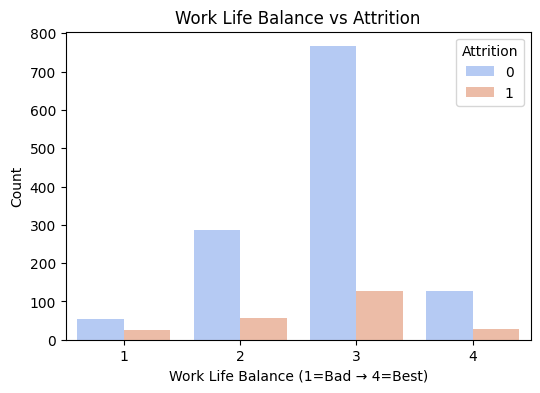

Attrition Percentage by WorkLifeBalance (%): 

Attrition                0          1
WorkLifeBalance                      
1                68.750000  31.250000
2                83.139535  16.860465
3                85.778275  14.221725
4                82.352941  17.647059


In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='coolwarm')
plt.title("Work Life Balance vs Attrition")
plt.xlabel("Work Life Balance (1=Bad → 4=Best)")
plt.ylabel("Count")
plt.show()

# Percentage attrition by WorkLifeBalance
wlb_attr = pd.crosstab(df['WorkLifeBalance'], df['Attrition'], normalize='index') * 100
print("Attrition Percentage by WorkLifeBalance (%): \n")
print(wlb_attr)

#### Numbers of Companies Worked

##### Univariate Analysis : Distribution

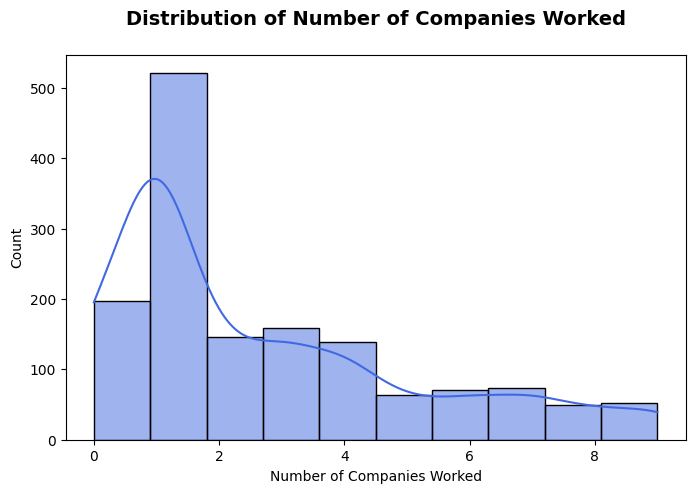

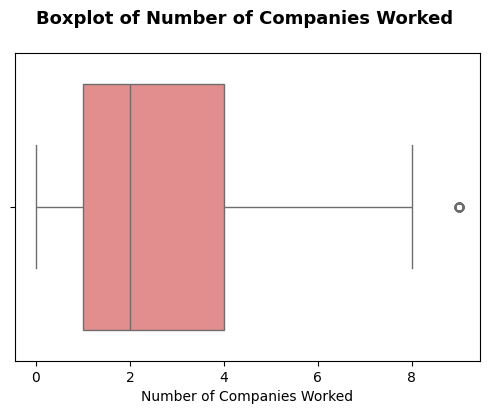

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(df['NumCompaniesWorked'], bins=10, kde=True, color='royalblue')
plt.title('Distribution of Number of Companies Worked\n', fontsize=14, fontweight='bold')
plt.xlabel('Number of Companies Worked')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['NumCompaniesWorked'], color='lightcoral')
plt.title('Boxplot of Number of Companies Worked \n', fontsize=13, fontweight='bold')
plt.xlabel('Number of Companies Worked')
plt.show()

##### Bivariate Analysis

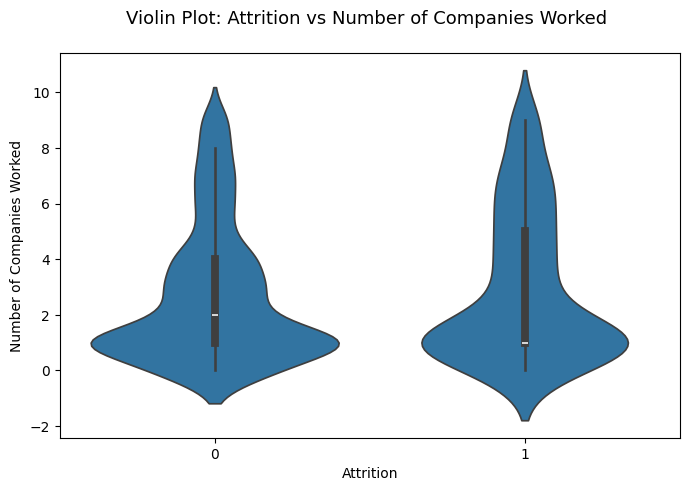

In [50]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Attrition', y='NumCompaniesWorked', data=df)
plt.title('Violin Plot: Attrition vs Number of Companies Worked \n', fontsize=13)
plt.xlabel('Attrition')
plt.ylabel('Number of Companies Worked')
plt.show()

#### Years In Current Role

##### Univariate Analysis

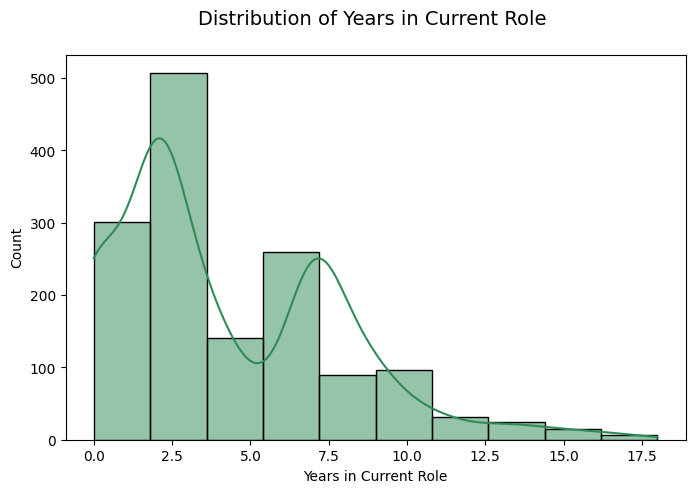

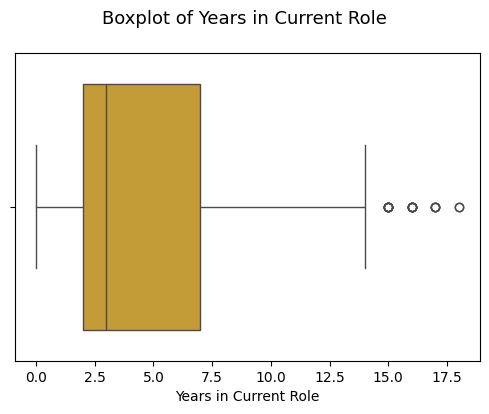

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(df['YearsInCurrentRole'], bins=10, kde=True, color='seagreen')
plt.title('Distribution of Years in Current Role \n', fontsize=14, )
plt.xlabel('Years in Current Role')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['YearsInCurrentRole'], color='goldenrod')
plt.title('Boxplot of Years in Current Role \n', fontsize=13, )
plt.xlabel('Years in Current Role')
plt.show()

##### Bivariate Analysis

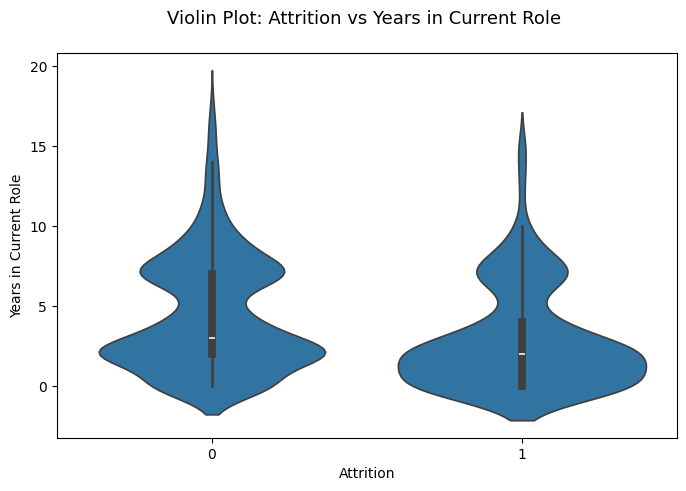

In [52]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Attrition', y='YearsInCurrentRole', data=df)
plt.title('Violin Plot: Attrition vs Years in Current Role \n', fontsize=13)
plt.xlabel('Attrition')
plt.ylabel('Years in Current Role')
plt.show()

#### Years Since Last Promotion

##### Univariate Analysis : Distribution

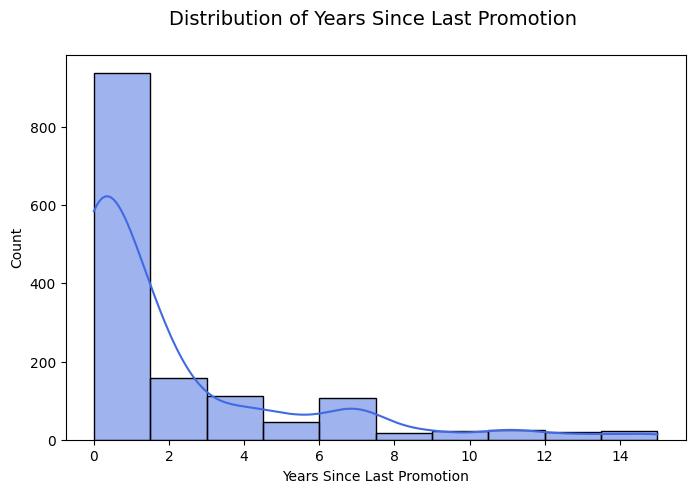

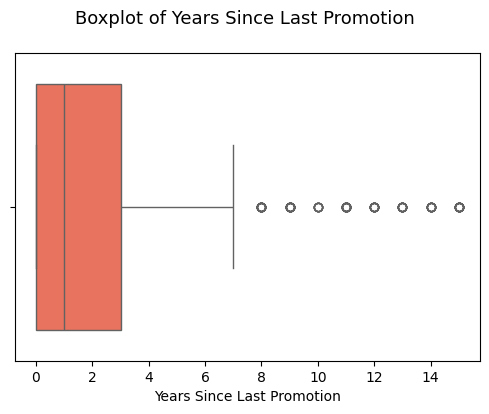

In [53]:
plt.figure(figsize=(8,5))
sns.histplot(df['YearsSinceLastPromotion'], bins=10, kde=True, color='RoyalBlue')
plt.title('Distribution of Years Since Last Promotion \n', fontsize=14)
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['YearsSinceLastPromotion'], color='tomato')
plt.title('Boxplot of Years Since Last Promotion \n', fontsize=13)
plt.xlabel('Years Since Last Promotion')
plt.show()

##### Bivariate Analysis : Years since last promotion X Attrition

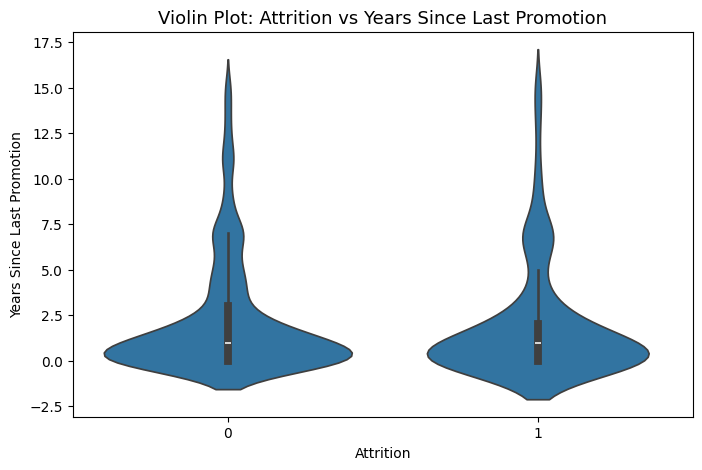

In [54]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Attrition', y='YearsSinceLastPromotion', data=df)
plt.title('Violin Plot: Attrition vs Years Since Last Promotion', fontsize=13)
plt.xlabel('Attrition')
plt.ylabel('Years Since Last Promotion')
plt.show()

### Multivariate Analysis

In [55]:
def VC_table(cols):
    table = df[cols].nunique().reset_index()
    table.columns = ['Column','Value Counts']
    
    print('Value Counts for each column of the combination')
    return table

1. Attrition By Job Satisfaction and Job Level

In [56]:
VC_table(['JobSatisfaction','JobLevel','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,JobSatisfaction,4
1,JobLevel,5
2,Attrition,2


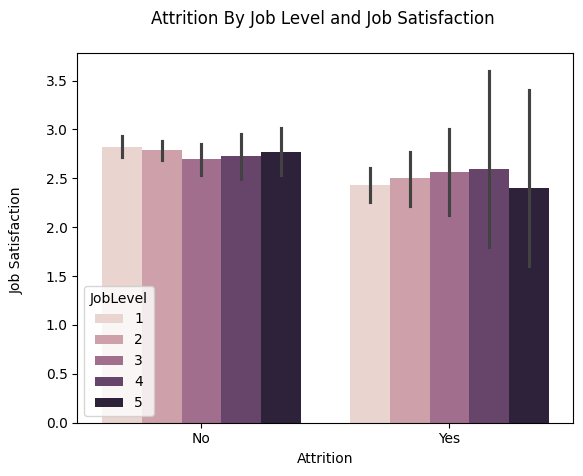

In [57]:
sns.barplot(y='JobSatisfaction', x='Attrition', hue='JobLevel', data=df)

plt.title('Attrition By Job Level and Job Satisfaction \n')
plt.ylabel('Job Satisfaction \n')
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])
plt.show()

2. Attrition By Overtime and Job Satisfaction

In [58]:
VC_table(['OverTime','JobSatisfaction','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,OverTime,2
1,JobSatisfaction,4
2,Attrition,2


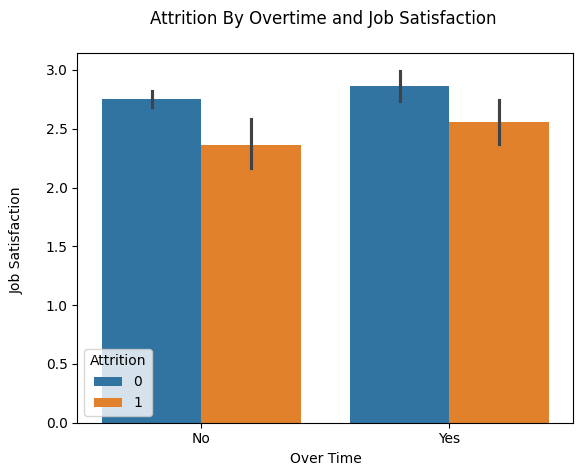

In [59]:
sns.barplot(data = df, x = 'OverTime', y ='JobSatisfaction', hue = 'Attrition')

plt.title('Attrition By Overtime and Job Satisfaction \n')
plt.ylabel('Job Satisfaction \n')
plt.xlabel('Over Time')

plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.show()


3. Attrition By Work-Life Balance and Job Satisfaction

In [60]:
VC_table(['WorkLifeBalance','JobSatisfaction','MaritalStatus','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,WorkLifeBalance,4
1,JobSatisfaction,4
2,MaritalStatus,3
3,Attrition,2


In [61]:
df[['WorkLifeBalance','JobSatisfaction', 'MaritalStatus', 'Attrition']].head(5)

,WorkLifeBalance,JobSatisfaction,MaritalStatus,Attrition
0,1,4,Single,1
1,3,2,Married,0
2,3,3,Single,1
3,3,3,Married,0
4,3,2,Married,0


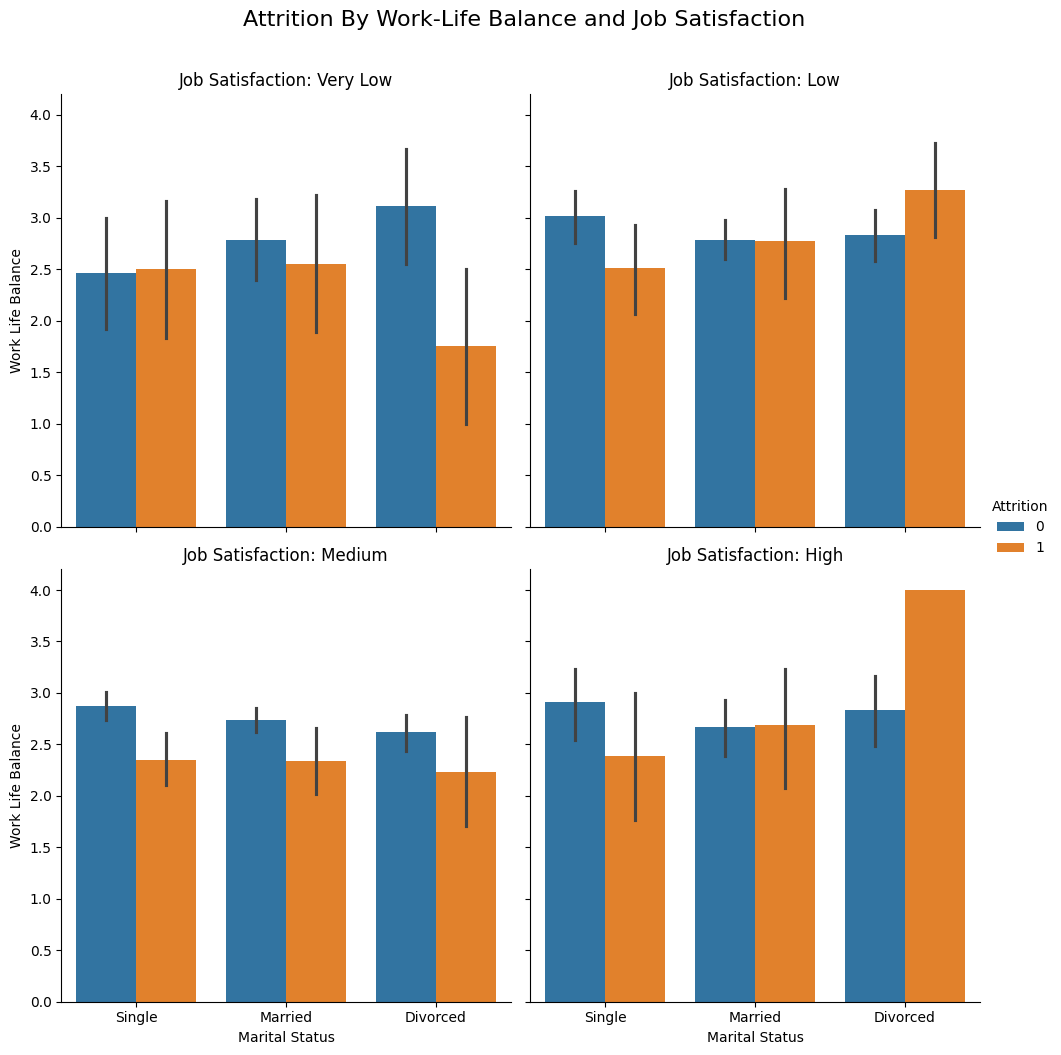

In [62]:
g = sns.catplot(data = df,kind = 'bar' , y = 'JobSatisfaction', col = 'WorkLifeBalance', x = 'MaritalStatus', hue ='Attrition', col_wrap=2)

satisfaction_labels = {
    1: "Very Low",
    2: "Low",
    3: "Medium",
    4: "High"
}

for ax, title in zip(g.axes.flat, g.col_names):
    ax.set_title(f"Job Satisfaction: {satisfaction_labels.get(title, title)}")

g.set_xlabels('Marital Status')
g.set_ylabels('Work Life Balance')
g.fig.suptitle("Attrition By Work-Life Balance and Job Satisfaction", fontsize=16, y=1.05)
plt.show()


4. Attrition By Years In current Role and Years Since Last promotion

In [63]:
VC_table(['YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,YearsInCurrentRole,19
1,YearsSinceLastPromotion,16
2,YearsWithCurrManager,18
3,Attrition,2


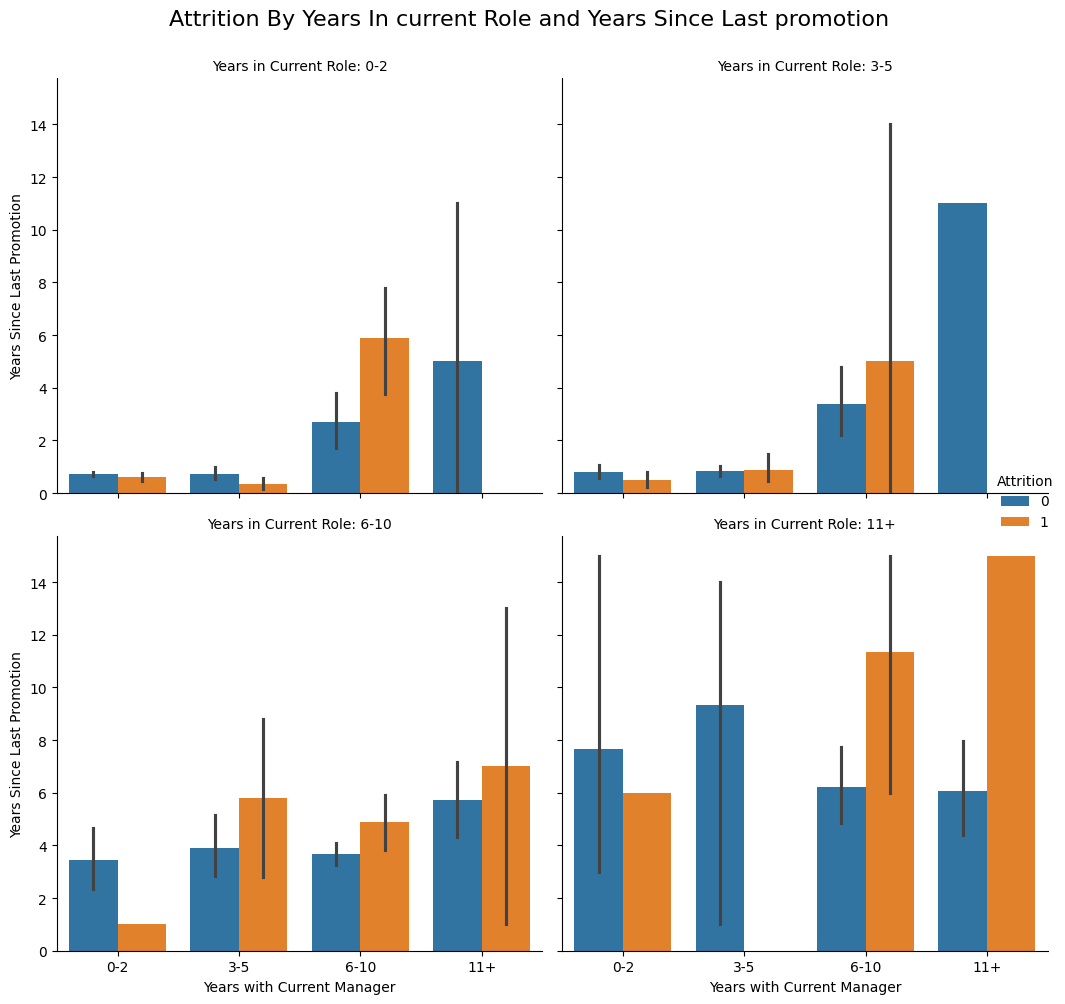

In [64]:
year_cols = df[['YearsInCurrentRole', 'YearsWithCurrManager']].columns.tolist()

test = {}

bin_edges = [0, 2, 5, 10, 20] 
bin_labels = ['0-2', '3-5', '6-10', '11+']

for col in year_cols:
    test[f'{col}_bin'] = pd.cut(
        df[col],
        bins=bin_edges,
        labels=bin_labels,
        include_lowest=True,
        right=True
    )
    

    
g = sns.catplot(data = test, kind = 'bar', x = 'YearsWithCurrManager_bin', y = df['YearsSinceLastPromotion'] , hue = df['Attrition'], col = 'YearsInCurrentRole_bin', col_wrap=2)

g.set_axis_labels("Years with Current Manager", "Years Since Last Promotion")

g.set_titles("Years in Current Role: {col_name}")

g.fig.suptitle('Attrition By Years In current Role and Years Since Last promotion', fontsize=16, y=1)
plt.tight_layout()
plt.show()

5. Average Monthly Income by Education and Attrition

In [65]:
test = pd.pivot_table(df, index = 'Education', columns= 'Attrition', values = 'MonthlyIncome', aggfunc='mean')

test

Attrition,0,1
Education,,
1,5926.129496,4360.161290
2,6586.058824,4282.545455
3,6882.919662,4770.242424
4,7087.814706,5335.155172
5,8559.906977,5850.200000


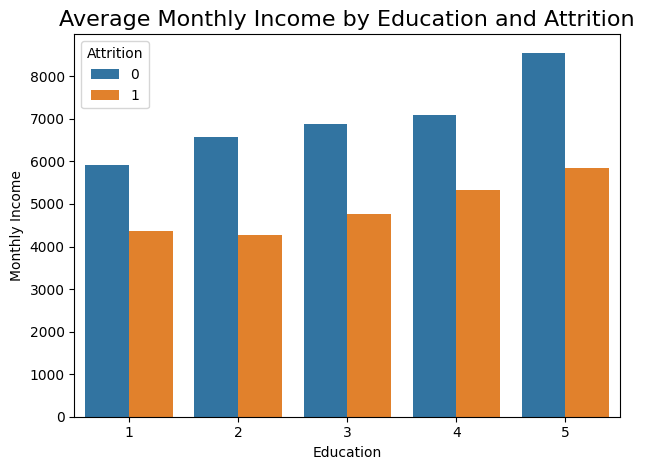

In [66]:
test_melted = test.reset_index().melt(id_vars='Education', value_name='MonthlyIncome', var_name='Attrition')

sns.barplot(data=test_melted, x='Education', y='MonthlyIncome', hue='Attrition')
plt.title('Average Monthly Income by Education and Attrition', fontsize=16)

plt.ylabel('Monthly Income')
plt.tight_layout()
plt.show()



6. Attrition By Performance Rating and Job Involvement

In [67]:
VC_table(['PerformanceRating','JobInvolvement','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,PerformanceRating,2
1,JobInvolvement,4
2,Attrition,2


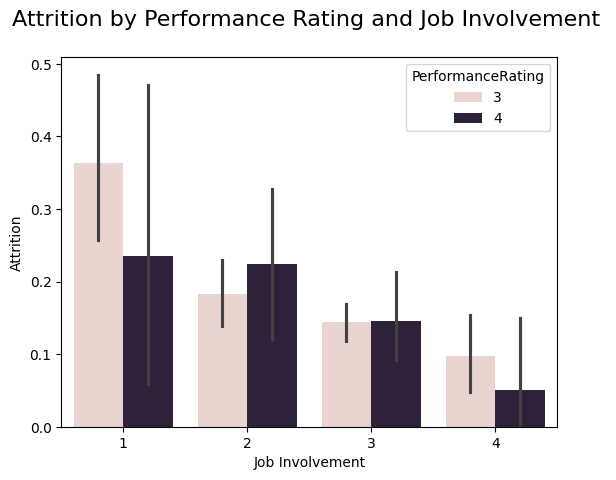

In [68]:
sns.barplot(data = df, x = 'JobInvolvement', y = 'Attrition', hue = 'PerformanceRating')

plt.title('Attrition by Performance Rating and Job Involvement \n',fontsize=16)
plt.xlabel('Job Involvement')
plt.show()

7. Attrition by Job Satisfaction and Job Involvement

In [69]:
VC_table(['JobInvolvement','JobSatisfaction','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,JobInvolvement,4
1,JobSatisfaction,4
2,Attrition,2


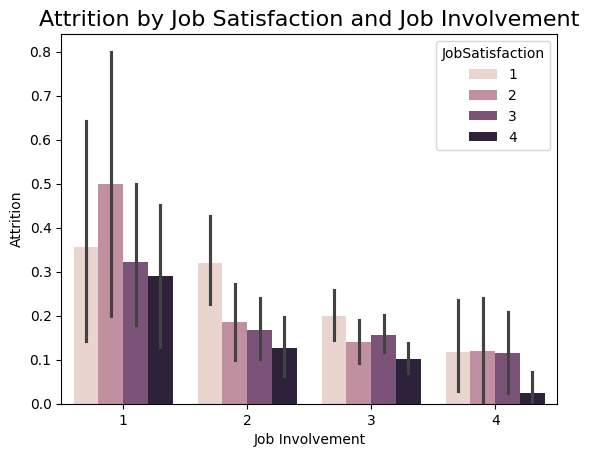

In [70]:
sns.barplot(data = df, x = 'JobInvolvement', y = 'Attrition', hue = 'JobSatisfaction')

plt.title('Attrition by Job Satisfaction and Job Involvement', fontsize=16)
plt.xlabel('Job Involvement')
plt.show()

8. Attrition By Numbers of companies worked and Total Working Years

In [71]:
VC_table(['NumCompaniesWorked','TotalWorkingYears','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,NumCompaniesWorked,10
1,TotalWorkingYears,40
2,Attrition,2


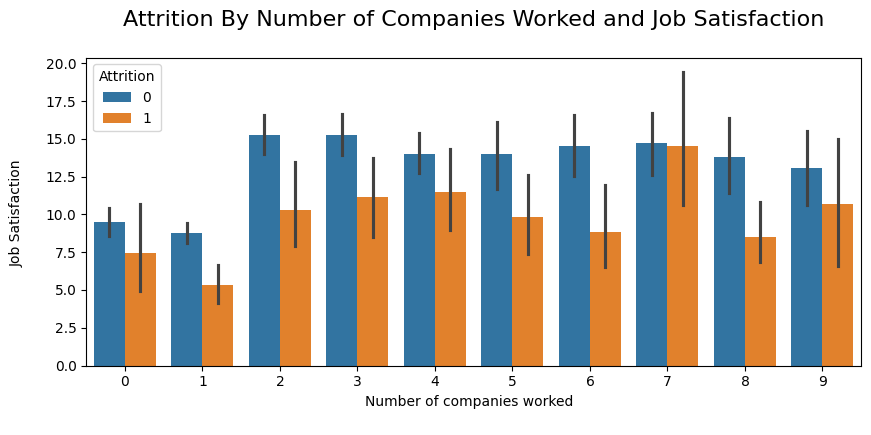

In [72]:
plt.figure(figsize = (10, 4))
sns.barplot(y='TotalWorkingYears', x='NumCompaniesWorked', hue='Attrition', data=df)

plt.title('Attrition By Number of Companies Worked and Job Satisfaction\n', fontsize=16)
plt.ylabel('Job Satisfaction \n')
plt.xlabel('Number of companies worked  \n')

plt.show()

9. Attrition by Environment Satisfaction and job Involvement 

In [73]:
VC_table(['EnvironmentSatisfaction','JobInvolvement','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,EnvironmentSatisfaction,4
1,JobInvolvement,4
2,Attrition,2


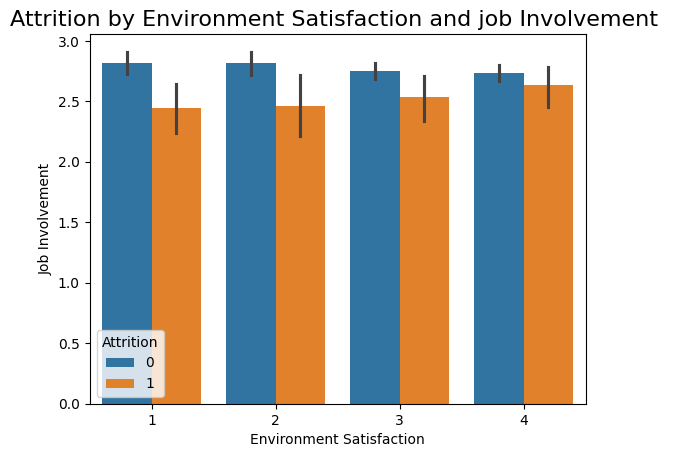

In [74]:
sns.barplot(data = df, x = 'EnvironmentSatisfaction', y = 'JobInvolvement', hue = 'Attrition')

plt.title('Attrition by Environment Satisfaction and job Involvement ', fontsize=16)
plt.xlabel('Environment Satisfaction')
plt.ylabel('Job Involvement')

plt.show()

10. Attrition by Business Travel and Marital Status

In [75]:
VC_table(['MaritalStatus','BusinessTravel','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,MaritalStatus,3
1,BusinessTravel,3
2,Attrition,2


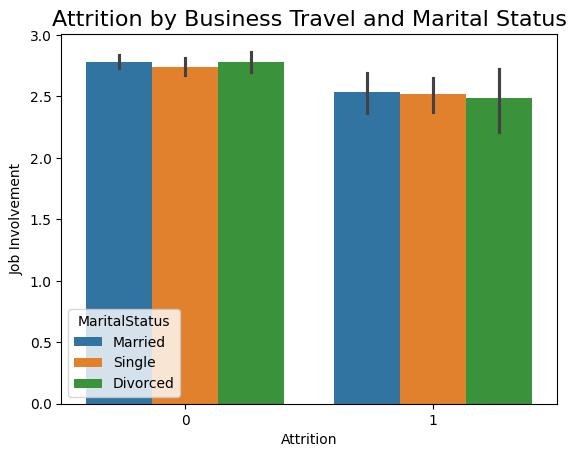

In [76]:
sns.barplot(data = df, x = 'Attrition', y = 'JobInvolvement', hue = 'MaritalStatus')

plt.title('Attrition by Business Travel and Marital Status', fontsize=16)
plt.ylabel('Job Involvement')
plt.show()

11. Attrition by Department and Job Satisfaction

In [77]:
VC_table(['Department', 'JobSatisfaction', 'Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,Department,3
1,JobSatisfaction,4
2,Attrition,2


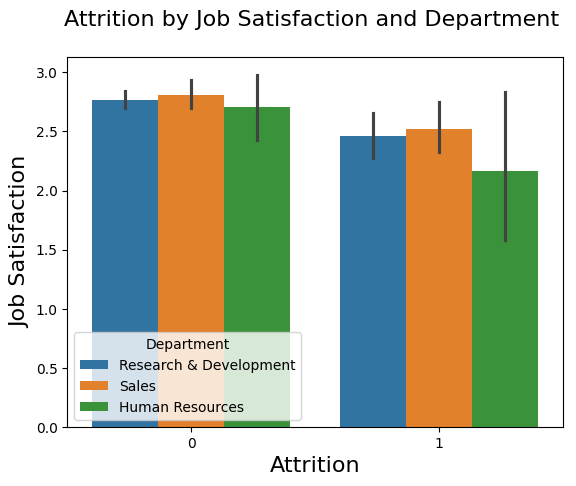

In [78]:
sns.barplot(data = df, x = 'Attrition', y = 'JobSatisfaction', hue = 'Department')

plt.title('Attrition by Job Satisfaction and Department \n', fontsize=16)
plt.ylabel('Job Satisfaction', fontsize=16)
plt.xlabel('Attrition', fontsize=16)
plt.show()

12. Attrition by Training Time Last Year and Job Level

In [79]:
VC_table(['TrainingTimesLastYear', 'JobLevel', 'Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,TrainingTimesLastYear,7
1,JobLevel,5
2,Attrition,2


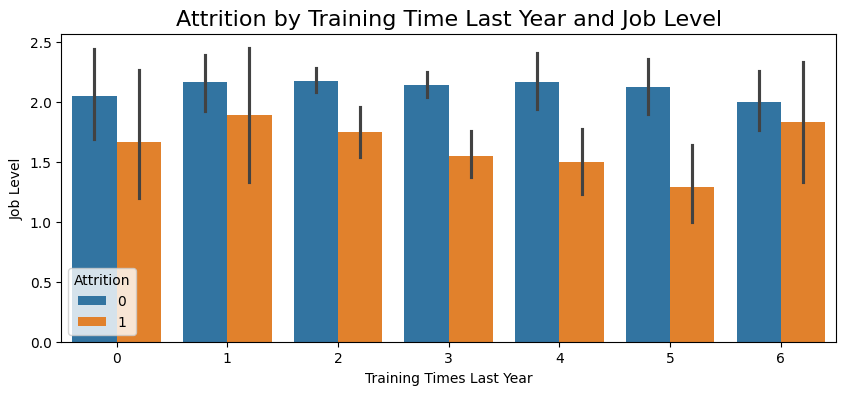

In [80]:
plt.figure(figsize = (10, 4))

sns.barplot(data = df, x = 'TrainingTimesLastYear', y = 'JobLevel', hue = 'Attrition')

plt.title('Attrition by Training Time Last Year and Job Level', fontsize = 16)
plt.xlabel('Training Times Last Year')
plt.ylabel('Job Level')
plt.show()

13. Attrition by Distance From Home and Job Satisfaction

In [81]:
VC_table(['DistanceFromHome', 'JobSatisfaction', 'Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,DistanceFromHome,29
1,JobSatisfaction,4
2,Attrition,2


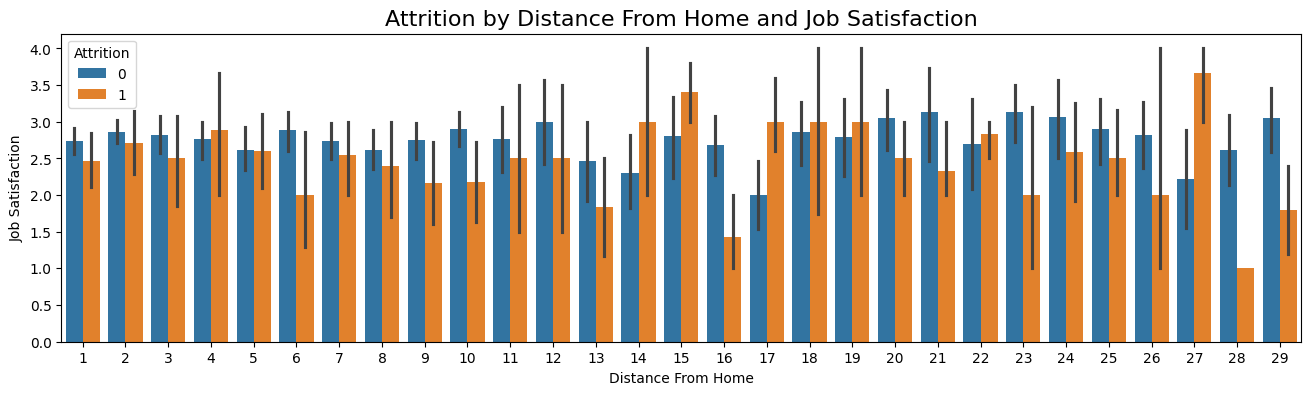

In [82]:
plt.figure(figsize = (16, 4))

sns.barplot(data = df, x = 'DistanceFromHome', y = 'JobSatisfaction', hue = 'Attrition')
plt.title('Attrition by Distance From Home and Job Satisfaction', fontsize = 16)
plt.xlabel('Distance From Home')
plt.ylabel('Job Satisfaction')
plt.show()

14. Attrition by Relationship Satisfaction and Job Satisfaction

In [83]:
VC_table(['RelationshipSatisfaction', 'JobSatisfaction', 'Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,RelationshipSatisfaction,4
1,JobSatisfaction,4
2,Attrition,2


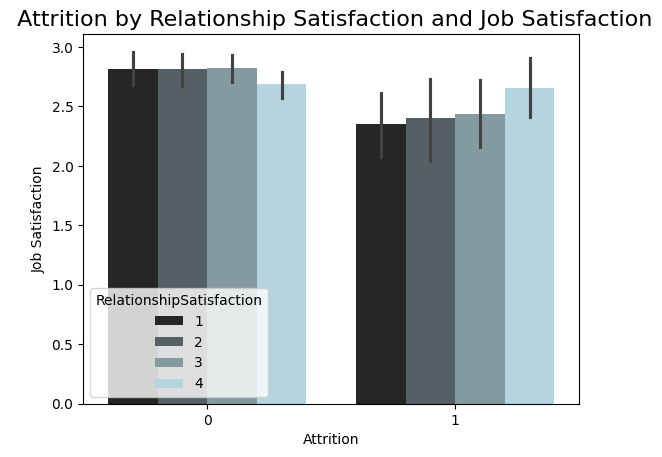

In [84]:
sns.barplot(data = df, x = 'Attrition', y = 'JobSatisfaction', hue = 'RelationshipSatisfaction', color='lightblue')

plt.title(' Attrition by Relationship Satisfaction and Job Satisfaction', fontsize = 16)
plt.ylabel('Job Satisfaction')
plt.show()

### Feature Engineering

#### Feature Addition

In [85]:
df.shape

(1470, 31)

In [86]:
# Add Tenure Feature 

df['Loyalty'] = round((df['YearsAtCompany'] / df['TotalWorkingYears']), 2)

df['Loyalty'].fillna(0, inplace=True)

df['Loyalty'].isnull().sum()

np.int64(0)

In [87]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Loyalty
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0.75
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1.00


In [88]:
print(df.shape)

(1470, 32)


#### Feature Selection

##### Define and Encode x

In [89]:
# Define x

x = df.drop( columns = ['Attrition','DailyRate', 'EducationField', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'StockOptionLevel','PercentSalaryHike'])

x.shape

(1470, 24)

In [90]:
# Get the categorical columns of variable x

x_numerical_cols = x.select_dtypes( include = 'number').columns.tolist()

x_non_ordinal_cols = x.select_dtypes(include = ['object']).columns.tolist()

print(str( len(x_non_ordinal_cols) ) + ' Categorical Columns of Independent Variable (x)  \n \n' + str(x_non_ordinal_cols) )

5 Categorical Columns of Independent Variable (x)  
 
['BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus']


In [91]:
# x columns 

x_ordinal_cols = [col for col in ordinal_cols if col in x.columns and col not in x_non_ordinal_cols]

print(f'Ordinal Columns of x : \n \n{x_ordinal_cols}')

print(f'\n Non-Ordinal / Nominal Columns of x : {x_non_ordinal_cols}')

Ordinal Columns of x : 
 
['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']

 Non-Ordinal / Nominal Columns of x : ['BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus']


In [92]:
x_numerical_cols = [col for col in x_numerical_cols if col not in x_ordinal_cols]

print(x_numerical_cols)


['Age', 'DistanceFromHome', 'NumCompaniesWorked', 'OverTime', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Loyalty']


In [93]:
# Define and encode y (Dependent Variable)

y = df['Attrition']

y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

### Modeling

In [94]:
# Split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [95]:
# Preprocessing 

preprocessors = ColumnTransformer(
    
    transformers = [
        
        ('One_hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), x_non_ordinal_cols),
        ('Ord_encoder', OrdinalEncoder(), x_ordinal_cols),
        ('num', 'passthrough', x_numerical_cols)
        
    ],
    
    remainder = 'drop'
)

In [96]:
cv = StratifiedKFold(n_splits = 4, shuffle = True, random_state=42)

In [97]:
# F1_score, PR score, Auc_score

def model_metric(pipeline, metric):
    for i in range(len(metric)):
        scores = cross_val_score(pipeline, x_train, y_train, cv = cv, scoring = metric[i], error_score='raise')
        pipeline.fit(x_train, y_train)
        
        print(f'{metric[i].upper()} : {scores.mean()} \n')
        
        print(f'{metric[i].upper()} (std) : {scores.std()} \n')
        
        print(classification_report(pipeline.predict(x_test), y_test))

    # Confusion Matrix chart
    
    ConfusionMatrixDisplay.from_predictions(y_test, pipeline.predict(x_test))
    plt.show()
    
    # ROC Curve
    
    probs = pipeline.predict_proba(x_test)
    preds = probs[:, 1] 
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
    # Precision-Recall Curve
    
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    avg_precision = average_precision_score(y_test, preds)
    plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()
    


In [107]:
# Feature Importance

def feature_importance(pipeline):

    importance = pipeline.named_steps['lr'].coef_[0]
    onehot_encoder = pipeline.named_steps['Preprocessors'].named_transformers_['One_hot']
    onehot_names = onehot_encoder.get_feature_names_out(x_non_ordinal_cols)
    
    ordinal_names = x_ordinal_cols
    numerical_names = x_numerical_cols

    all_feature_names = list(onehot_names) + ordinal_names + numerical_names
    
    coef_df = pd.DataFrame({
        'feature': all_feature_names,
        'coefficient': importance
    }).sort_values(by='coefficient', key=abs, ascending=False)
    
    return coef_df


In [99]:
# grid search parameters function

def grid_search(grid):
    grid.fit(x_train, y_train)
    y_pred_lr = grid.predict(x_test)
    
    print("Best params:", grid.best_params_)
    print("Best F1_macro:", grid.best_score_)
    print(classification_report(y_test, y_pred_lr))
    


#### Logistic Regressor

PRECISION : 0.7534169613910994 

PRECISION (std) : 0.07132172077235593 

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       265
           1       0.38      0.62      0.47        29

    accuracy                           0.86       294
   macro avg       0.67      0.76      0.70       294
weighted avg       0.90      0.86      0.88       294

RECALL : 0.41500443262411346 

RECALL (std) : 0.08845188686238621 

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       265
           1       0.38      0.62      0.47        29

    accuracy                           0.86       294
   macro avg       0.67      0.76      0.70       294
weighted avg       0.90      0.86      0.88       294

ROC_AUC : 0.8385130718568039 

ROC_AUC (std) : 0.00340509240131137 

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       265
           1       0.38    

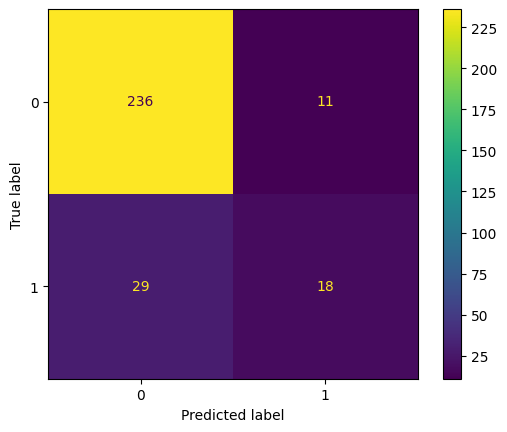

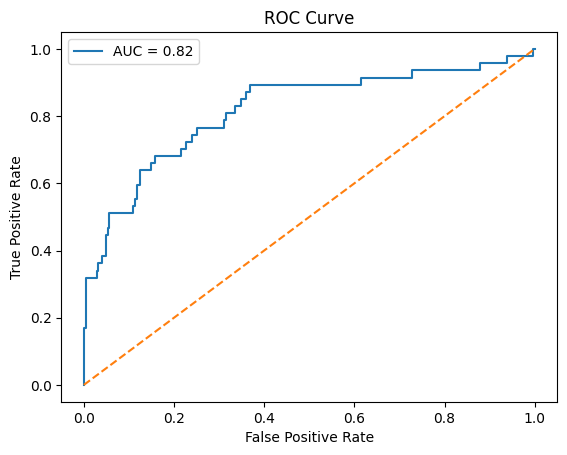

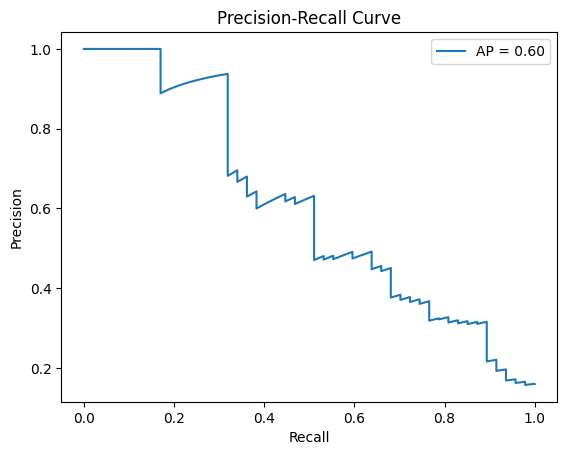

,feature,coefficient
31,OverTime,0.856419
36,YearsSinceLastPromotion,0.593773
30,NumCompaniesWorked,0.536229
13,JobRole_Research Director,-0.514738
21,EnvironmentSatisfaction,-0.478143
37,YearsWithCurrManager,-0.423837
24,JobSatisfaction,-0.423488
28,Age,-0.417608
35,YearsInCurrentRole,-0.396970
29,DistanceFromHome,0.376280


In [108]:
# Baseline Model

Pipe_lr = Pipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
    
])


model_metric(Pipe_lr, ['precision', 'recall', 'roc_auc', 'f1_macro'])

feature_importance(Pipe_lr)

PRECISION : 0.38392857142857145 

PRECISION (std) : 0.02023348488086347 

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       218
           1       0.68      0.42      0.52        76

    accuracy                           0.80       294
   macro avg       0.75      0.68      0.70       294
weighted avg       0.79      0.80      0.78       294

RECALL : 0.6888297872340425 

RECALL (std) : 0.0843183681061875 

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       216
           1       0.64      0.38      0.48        78

    accuracy                           0.78       294
   macro avg       0.72      0.65      0.67       294
weighted avg       0.76      0.78      0.76       294

ROC_AUC : 0.8310047284241899 

ROC_AUC (std) : 0.004409686346902792 

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       213
           1       0.64    

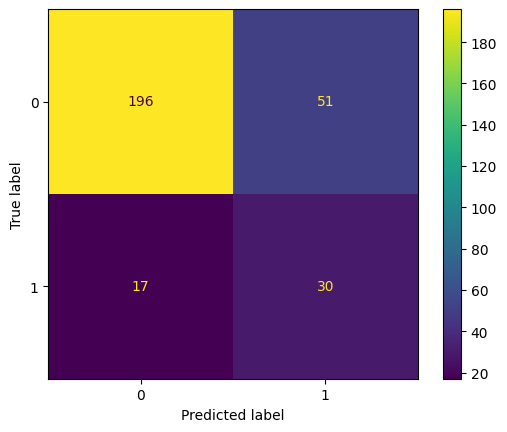

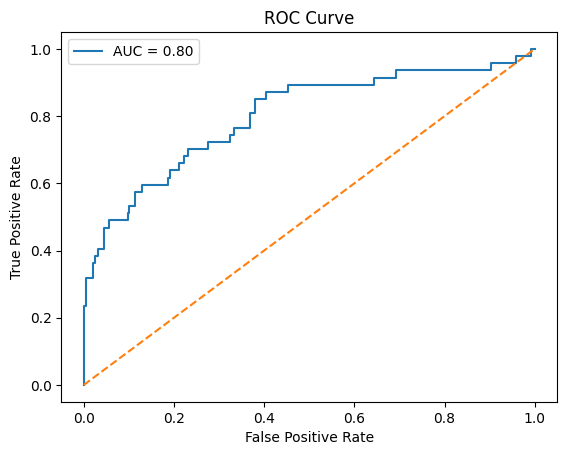

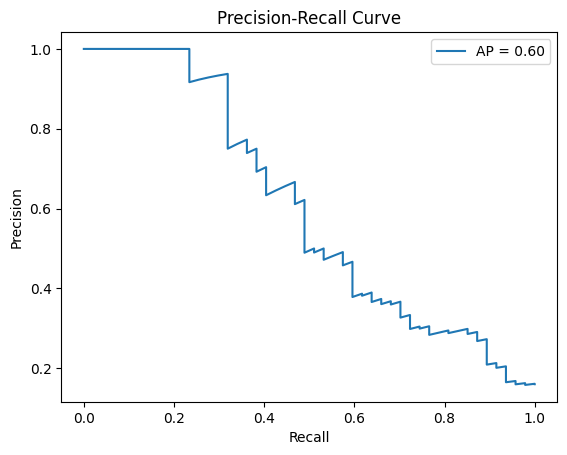

Fitting 4 folds for each of 1080 candidates, totalling 4320 fits
Best params: {'lr__C': 0.01, 'lr__class_weight': None, 'lr__max_iter': 200, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
Best F1_macro: 0.6888911267263886
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       247
           1       0.38      0.62      0.47        47

    accuracy                           0.78       294
   macro avg       0.65      0.71      0.67       294
weighted avg       0.83      0.78      0.80       294



,feature,coefficient
31,OverTime,0.896445
13,JobRole_Research Director,-0.783416
32,TotalWorkingYears,-0.727107
23,JobLevel,0.696971
30,NumCompaniesWorked,0.620115
36,YearsSinceLastPromotion,0.609661
0,BusinessTravel_Non-Travel,-0.499201
21,EnvironmentSatisfaction,-0.495155
10,JobRole_Laboratory Technician,0.471253
9,JobRole_Human Resources,0.460339


: 

In [ ]:
Pipe_lr_balanced = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('lr', LogisticRegression(random_state=42))
    
])

param_grid_lr = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10],
    'lr__penalty': ['l1', 'l2', 'elasticnet'],
    'lr__class_weight': [None, 'balanced'],
    'lr__solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] ,
    'lr__max_iter' : [100, 200, 300, 400, 500, 600],
}

grid_lr = GridSearchCV(
    estimator=Pipe_lr_balanced,
    param_grid=param_grid_lr,
    cv=cv,
    scoring={
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc',
    'f1' : 'f1',
    'f1_macro' : 'f1_macro'
},
    refit='f1_macro',
    n_jobs=-1,
    verbose=2
)

model_metric(Pipe_lr_balanced, ['precision', 'recall', 'roc_auc'])

grid_search(grid_lr)

feature_importance(Pipe_lr_balanced)


PRECISION : 0.37847426547073476 

PRECISION (std) : 0.018248719596351236 

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       218
           1       0.64      0.39      0.49        76

    accuracy                           0.79       294
   macro avg       0.73      0.66      0.68       294
weighted avg       0.77      0.79      0.77       294

RECALL : 0.6886081560283688 

RECALL (std) : 0.09021261306314822 

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       217
           1       0.66      0.40      0.50        77

    accuracy                           0.79       294
   macro avg       0.74      0.66      0.68       294
weighted avg       0.77      0.79      0.77       294

ROC_AUC : 0.8281674280666271 

ROC_AUC (std) : 0.005613262400894667 

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       213
           1       0.62  

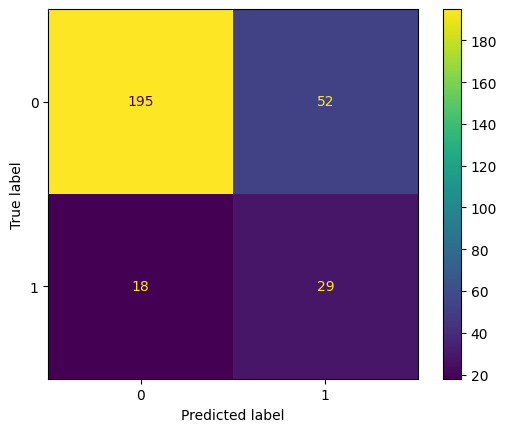

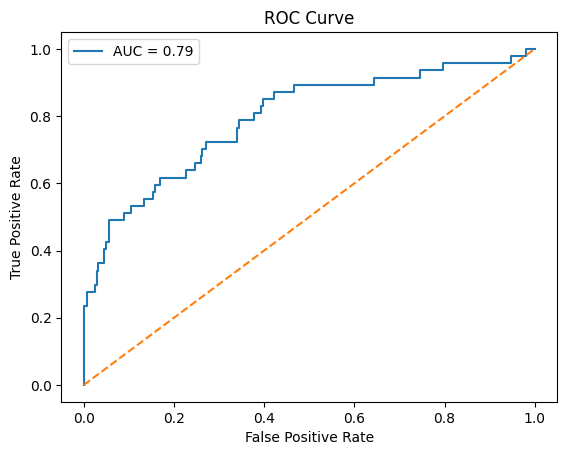

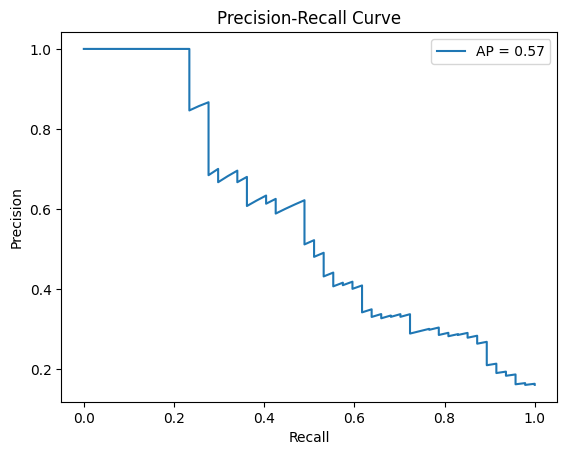

: 

In [ ]:
final_lr = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('lr', LogisticRegression(random_state=42, C = 1, class_weight= 'balanced', max_iter= 500, solver = 'sag', penalty='l2'))
    
])

model_metric(final_lr, ['precision', 'recall', 'roc_auc'])

#### Random Forest Classifier

F1_MACRO : 0.6233618608793585 

F1_MACRO (std) : 0.02931341559496544 

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       282
           1       0.13      0.50      0.20        12

    accuracy                           0.84       294
   macro avg       0.55      0.68      0.56       294
weighted avg       0.94      0.84      0.88       294

PRECISION : 0.8460526315789474 

PRECISION (std) : 0.15404854974543045 

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       285
           1       0.11      0.56      0.18         9

    accuracy                           0.84       294
   macro avg       0.55      0.70      0.55       294
weighted avg       0.96      0.84      0.89       294

RECALL : 0.193927304964539 

RECALL (std) : 0.08539246437660789 

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       280
           1       0.15    

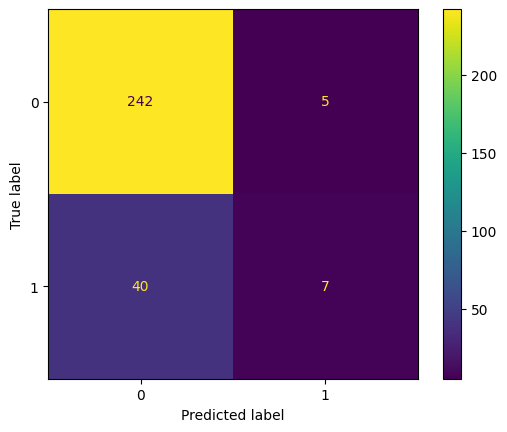

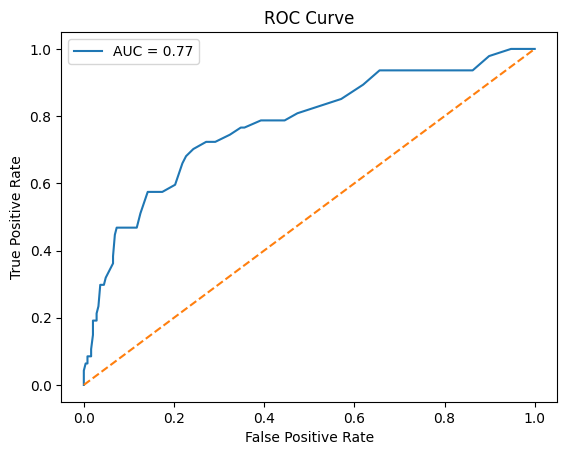

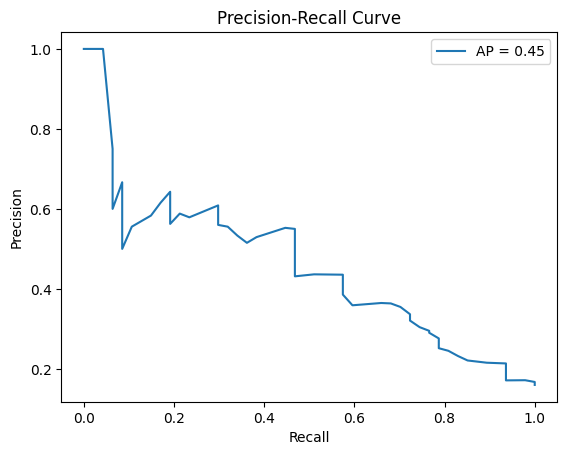

: 

In [ ]:
Pipe_rf = Pipeline([
    
    ('Preprocessors', preprocessors),
    ('lr', RandomForestClassifier())
    
])

model_metric(Pipe_rf, ['f1_macro', 'precision', 'recall', 'roc_auc'])

#### XGBoost Classifier

PRECISION : 0.6666329966329967 

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       268
           1       0.32      0.58      0.41        26

    accuracy                           0.85       294
   macro avg       0.64      0.73      0.66       294
weighted avg       0.90      0.85      0.87       294

RECALL : 0.3683510638297872 

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       268
           1       0.32      0.58      0.41        26

    accuracy                           0.85       294
   macro avg       0.64      0.73      0.66       294
weighted avg       0.90      0.85      0.87       294

ROC_AUC : 0.785395601817322 

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       268
           1       0.32      0.58      0.41        26

    accuracy                           0.85       294
   macro avg       0.64      0.73  

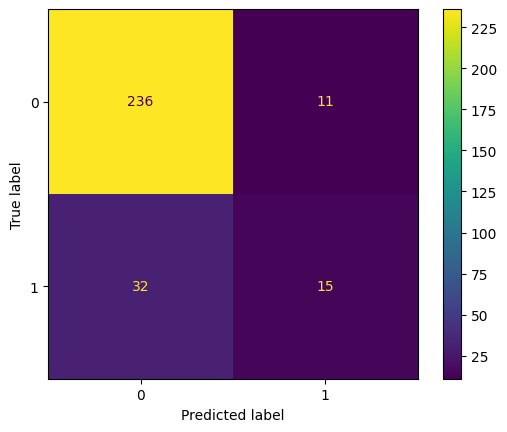

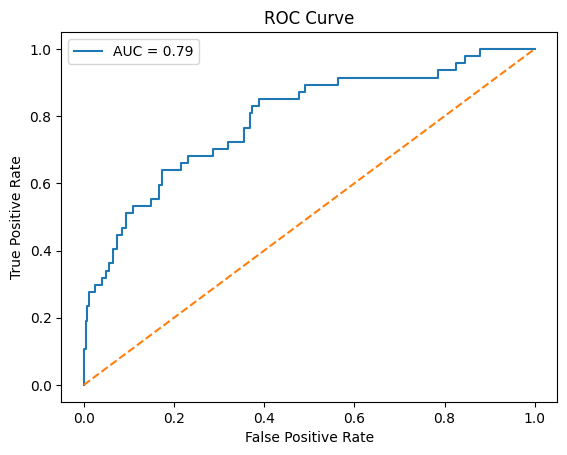

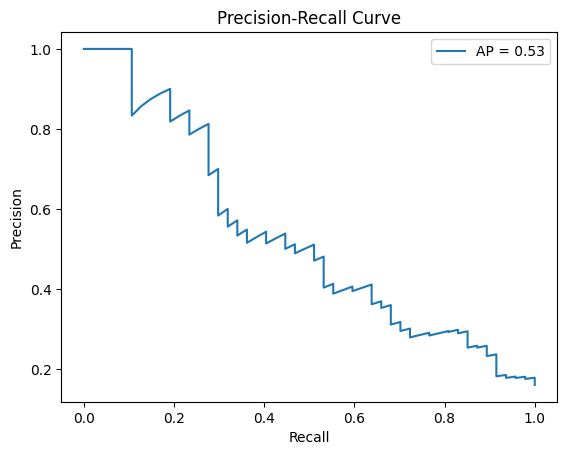

: 

In [ ]:
Pipe_xgbc = Pipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('lr', XGBClassifier())
    
])

model_metric(Pipe_xgbc, ['precision', 'recall', 'roc_auc'])

PRECISION : 0.6269364898397156 

PRECISION (std) : 0.11864380964755358 

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       268
           1       0.34      0.62      0.44        26

    accuracy                           0.86       294
   macro avg       0.65      0.75      0.68       294
weighted avg       0.90      0.86      0.88       294

RECALL : 0.38918439716312053 

RECALL (std) : 0.06050166577700705 

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       268
           1       0.34      0.62      0.44        26

    accuracy                           0.86       294
   macro avg       0.65      0.75      0.68       294
weighted avg       0.90      0.86      0.88       294

ROC_AUC : 0.7908485640317146 

ROC_AUC (std) : 0.015636261752022824 

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       268
           1       0.34   

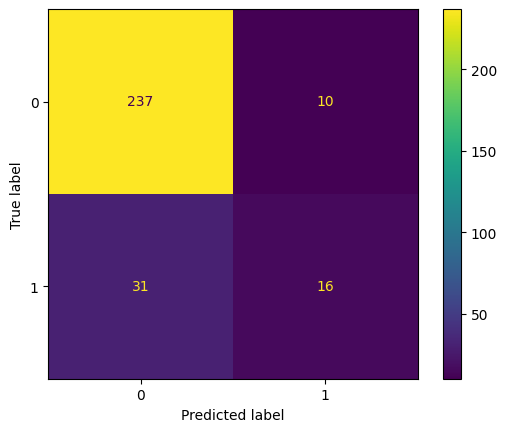

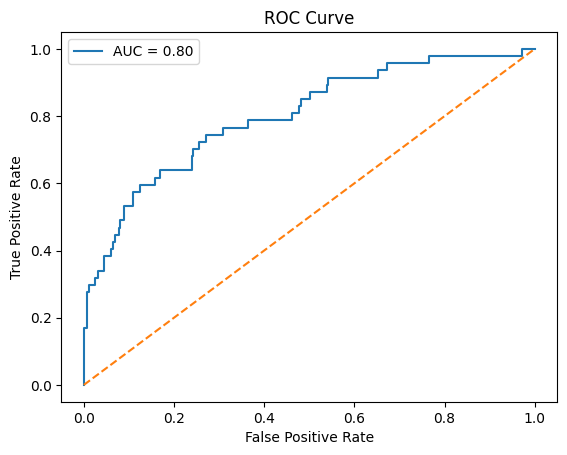

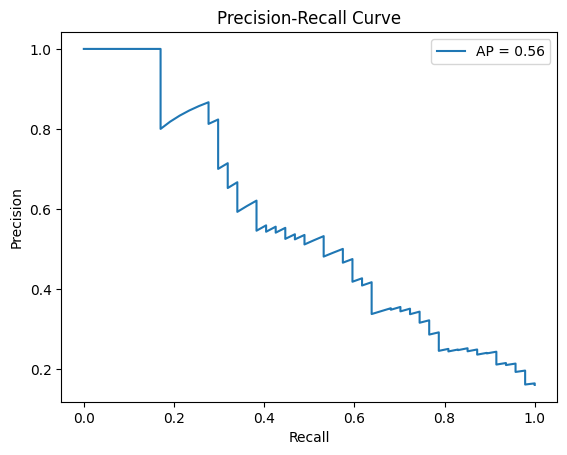

: 

In [ ]:
Pipe_xgbc_balanced = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('xgbc', XGBClassifier())
    
])

model_metric(Pipe_xgbc_balanced, ['precision', 'recall', 'roc_auc'])

In [ ]:
model_table = pd.Series({
    
})

: 